## BGP data feature per ASN

In [1]:
from bgp_data_generation import extract_bgp_data, plot_statistics, detect_anomalies, extract_bgp_data_and_build_weighted_graph, plot_weighted_graph
import pandas as pd

# Google Leak

Starting data collection from 2017-08-25 00:00:00 to 2017-08-26 00:00:00 for collectors ['rrc00']


1726315867 HTTP ERROR: Couldn't connect to server (7)
2024-09-14 21:11:07 1735008: bs_transport_file.c:39: ERROR: Could not open http://data.ris.ripe.net/rrc00/2017.08/updates.20170825.0025.gz for reading
2024-09-14 21:11:07 1735008: bgpstream_transport.c:97: ERROR: Could not open resource (http://data.ris.ripe.net/rrc00/2017.08/updates.20170825.0025.gz)
2024-09-14 21:11:07 1735008: bgpstream_reader.c:169: WARNING: Could not open (http://data.ris.ripe.net/rrc00/2017.08/updates.20170825.0025.gz). Attempt 1 of 5


Total records processed: 5135458
Total elements processed: 12968844
Data saved to bgp_weighted_graph_asn_15169_google_leak.csv
Graph construction complete with 14 nodes and 16 edges.


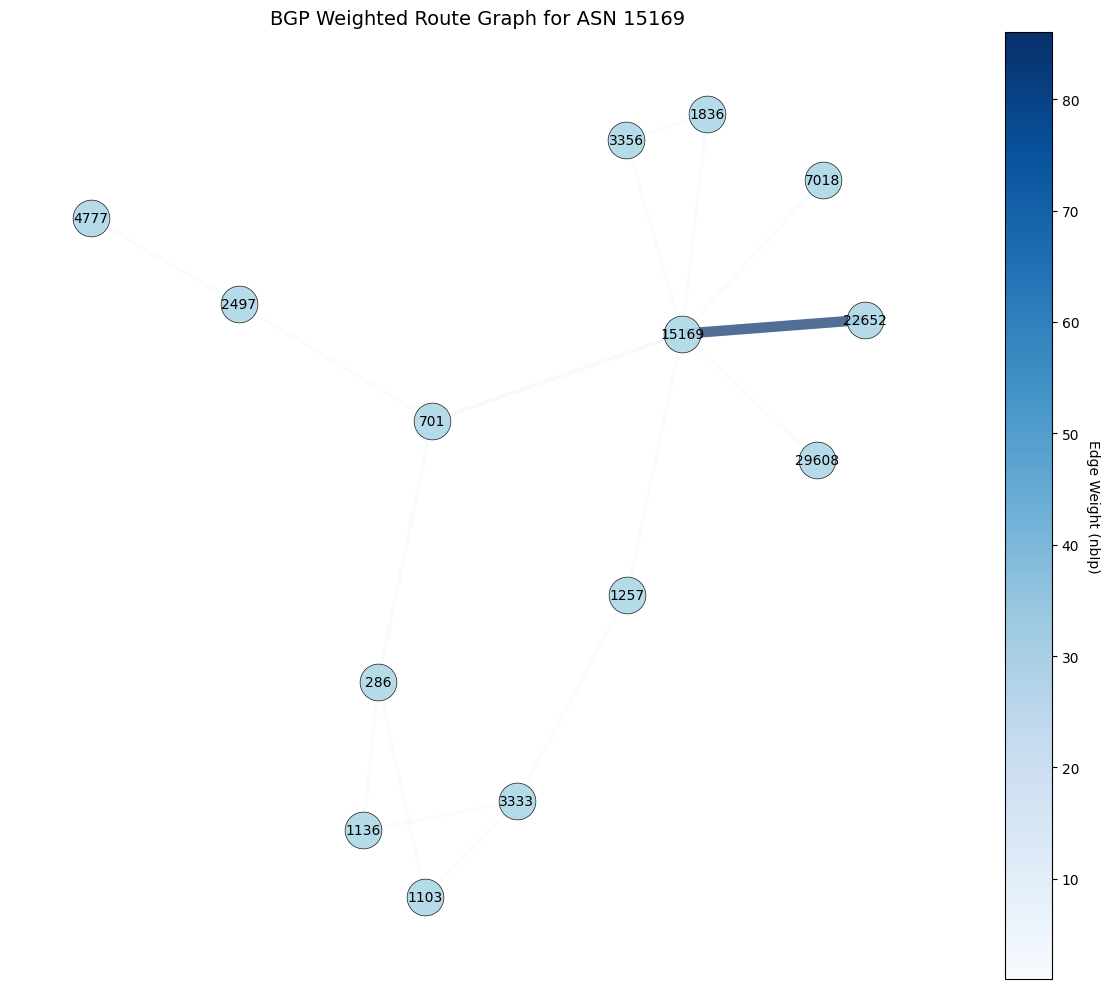

In [6]:
target_asn = "15169"  # Google's ASN
from_time = "2017-08-25 00:00:00"
until_time = "2017-08-26 00:00:00"
collectors = ["rrc00"]
output_file = f'bgp_weighted_graph_asn_{target_asn}_google_leak.csv'

G = extract_bgp_data_and_build_weighted_graph(target_asn, from_time, until_time, collectors, output_file)

plot_weighted_graph(G, title=f"BGP Weighted Route Graph for ASN {target_asn}")

In [ ]:
target_asn = "15169"
# target_asn = "37282"
# target_asn = "4809"

from_time="2017-08-25 03:00:00"
until_time="2017-08-25 04:00:00"
collectors = ["rrc00"]
output_file = f'bgp_features_asn_{target_asn}_google_leak.csv'

df_features = extract_bgp_data(target_asn, from_time, until_time, collectors, output_file)
df_features['timestamp'] = pd.to_datetime(df_features['timestamp'])
numeric_cols = df_features.select_dtypes(include=['number']).columns
plot_statistics(df_features, target_asn)

In [5]:
from datetime import datetime, timedelta
import pandas as pd

df_features = pd.read_csv('/home/hb/dataset_bgp/bgp_tab_dataset/bgp_features_asn_15169_google_leak_with_labels.csv')
df_features = df_features.drop(columns=['anomaly_status'])

# Calculate the difference between consecutive rows
df_features['timestamp'] = pd.to_datetime(df_features['timestamp'])
numeric_cols = df_features.select_dtypes(include=['number']).columns

# Detect anomalies
df_features = detect_anomalies(df_features, numeric_cols, threshold_multiplier=2)
print(df_features)

df_features.to_csv(f'bgp_features_asn_15169_google_leak_with_labels.csv', index=False)

             timestamp    asn  num_routes  num_new_routes  num_withdrawals  \
0  2017-08-25 03:00:00  15169           0               0                0   
1  2017-08-25 03:05:00  15169           0               0                0   
2  2017-08-25 03:10:00  15169           0               0                0   
3  2017-08-25 03:15:00  15169           0               0                0   
4  2017-08-25 03:20:00  15169         730             730                0   
..                 ...    ...         ...             ...              ...   
56 2017-08-25 07:40:00  15169           0               0                0   
57 2017-08-25 07:45:00  15169           0               0                0   
58 2017-08-25 07:50:00  15169           0               0                0   
59 2017-08-25 07:55:00  15169           0               0                0   
60 2017-08-25 08:00:00  15169           0               0                0   

    num_origin_changes  num_route_changes  max_path_length  avg

# April 2018: 1300 IP addresses within Amazon Web Services space were hijacked by eNet
eNET (AS10297)
Hurricane Electric (AS6939)

In [19]:
target_asn = "6939"
# target_asn = "10297"
from_time="2018-04-25 10:00:00"
until_time="2018-04-25 13:00:00"
collectors = ["rrc00", "rrc06"]
output_file = f'bgp_features_asn_{target_asn}_amazone_hijack.csv'

df_features = extract_bgp_data(target_asn, from_time, until_time, collectors, output_file)
df_features['timestamp'] = pd.to_datetime(df_features['timestamp'])
numeric_cols = df_features.select_dtypes(include=['number']).columns
plot_statistics(df_features, target_asn)

             timestamp   asn  num_routes  num_new_routes  num_withdrawals  \
0  2018-04-25 10:00:00  6939           0               0                0   
1  2018-04-25 10:05:00  6939           0               0                0   
2  2018-04-25 10:10:00  6939           0               0                0   
3  2018-04-25 10:15:00  6939           0               0                0   
4  2018-04-25 10:20:00  6939           0               0                0   
5  2018-04-25 10:25:00  6939           0               0                0   
6  2018-04-25 10:30:00  6939           0               0                0   
7  2018-04-25 10:35:00  6939           0               0                0   
8  2018-04-25 10:40:00  6939           0               0                0   
9  2018-04-25 10:45:00  6939           0               0                0   
10 2018-04-25 10:50:00  6939           0               0                0   
11 2018-04-25 10:55:00  6939           0               0                0   

/tmp/ipykernel_211634/1777972919.py:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = cm.get_cmap('tab20', num_colors)


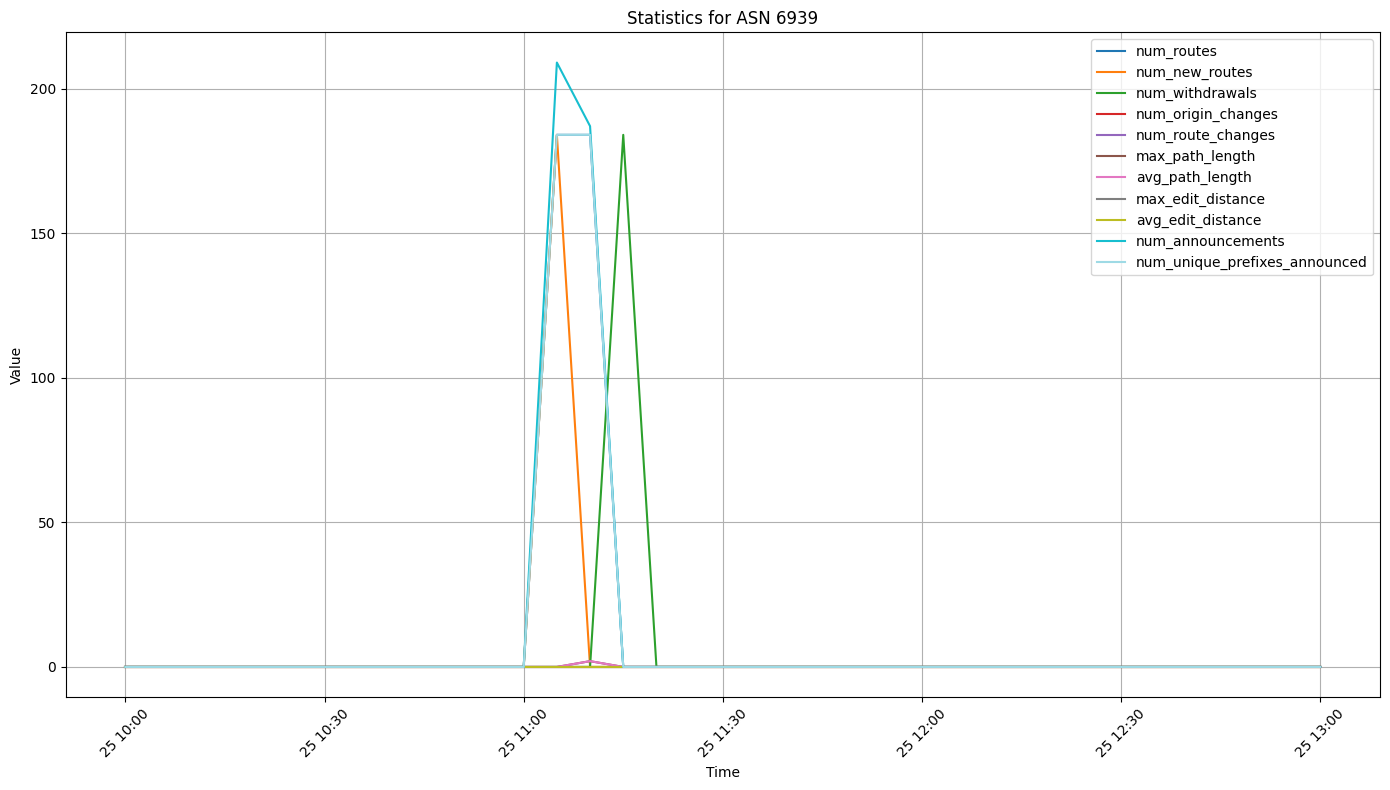

In [20]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm

df_features['timestamp'] = pd.to_datetime(df_features['timestamp'])
numeric_cols = df_features.select_dtypes(include=['number']).columns

# Define the color map
num_colors = len(numeric_cols)
color_map = cm.get_cmap('tab20', num_colors)

plt.figure(figsize=(14, 8))
for i, col in enumerate(numeric_cols):
    plt.plot(df_features['timestamp'], df_features[col], label=col, color=color_map(i))

plt.xlabel('Time')
plt.ylabel('Value')
plt.title(f'Statistics for ASN {target_asn}')
plt.legend(loc='upper right')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [15]:
import pandas as pd

# target_asn = "10297"
target_asn = "6939"

df_features = pd.read_csv('/home/hb/dataset_bgp/bgp_tab_dataset/bgp_features_asn_6939_with_labels.csv')
df_features = df_features.drop(columns=['anomaly_status'])
df_features['timestamp'] = pd.to_datetime(df_features['timestamp'])
numeric_cols = df_features.select_dtypes(include=['number']).columns

df_features = detect_anomalies(df_features, numeric_cols, threshold_multiplier=2)

df_features.to_csv(f'bgp_features_asn_{target_asn}_amazon_with_labels.csv', index=False)

# Traffic for Google, Apple, Facebook, Microsoft and other tech giants routed through Russia

Origin AS of 39523

In [10]:
target_asn = "39523"
from_time="2017-12-12 03:00:00"
until_time="2017-12-12 08:00:00"
collectors = ["rrc00", "route-views2", "route-views3", "route-views4", "ris-ripe"]
output_file = f'bgp_features_asn_{target_asn}_russian_hijack.csv'

df_features = extract_bgp_data(target_asn, from_time, until_time, collectors, output_file)
df_features['timestamp'] = pd.to_datetime(df_features['timestamp'])
numeric_cols = df_features.select_dtypes(include=['number']).columns
plot_statistics(df_features, target_asn)

             timestamp    asn  num_routes  num_new_routes  num_withdrawals  \
0  2017-12-12 04:00:00  39523           0               0                0   
1  2017-12-12 04:05:00  39523           0               0                0   
2  2017-12-12 04:10:00  39523           0               0                0   
3  2017-12-12 04:15:00  39523           0               0                0   
4  2017-12-12 04:20:00  39523           0               0                0   
5  2017-12-12 04:25:00  39523           0               0                0   
6  2017-12-12 04:30:00  39523           0               0                0   
7  2017-12-12 04:35:00  39523           0               0                0   
8  2017-12-12 04:40:00  39523          77              77              393   
9  2017-12-12 04:45:00  39523          50               3             1470   
10 2017-12-12 04:50:00  39523           0               0               50   
11 2017-12-12 04:55:00  39523           0               0       

/tmp/ipykernel_219293/1777972919.py:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = cm.get_cmap('tab20', num_colors)


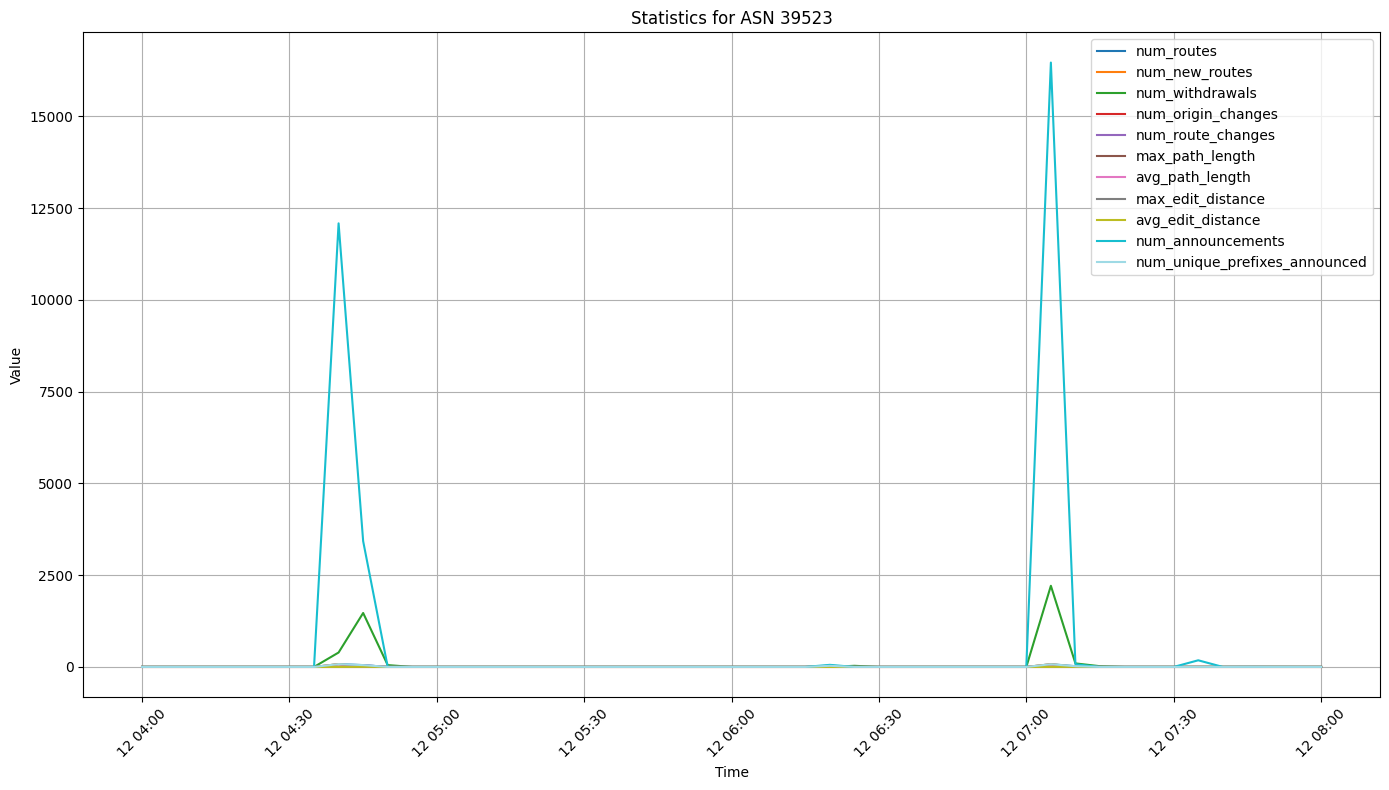

In [11]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm

df_features['timestamp'] = pd.to_datetime(df_features['timestamp'])
numeric_cols = df_features.select_dtypes(include=['number']).columns

# Define the color map
num_colors = len(numeric_cols)
color_map = cm.get_cmap('tab20', num_colors)

# Plotting the statistics
plt.figure(figsize=(14, 8))
for i, col in enumerate(numeric_cols):
    plt.plot(df_features['timestamp'], df_features[col], label=col, color=color_map(i))

plt.xlabel('Time')
plt.ylabel('Value')
plt.title(f'Statistics for ASN {target_asn}')
plt.legend(loc='upper right')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# April 8, 2010 Chinese ISP hijacks the Internet
AS23724

Total records processed: 3176841
Total elements processed: 9884028
Data saved to bgp_features_asn_23724_chinese_isp.csv


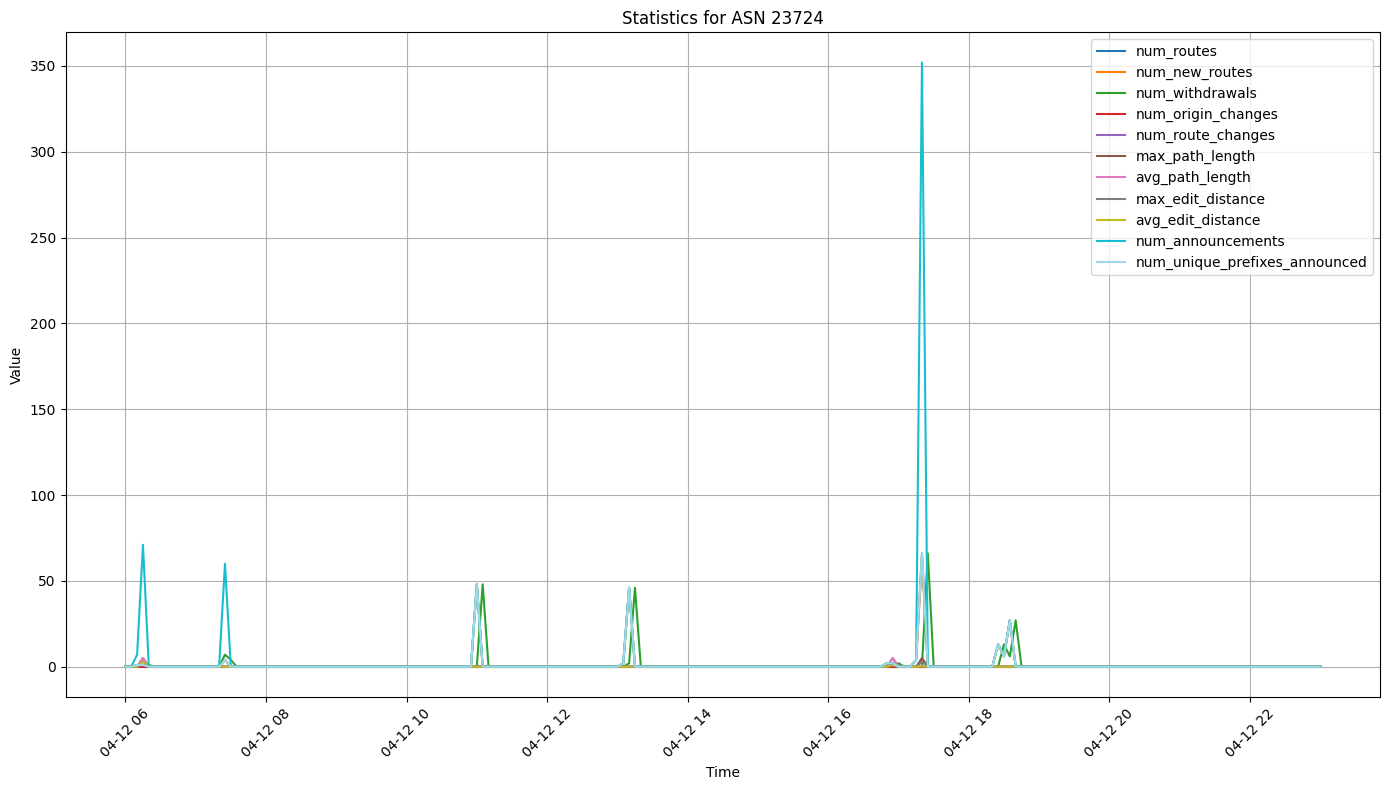

In [6]:
target_asn = "23724"
from_time = "2010-4-12 06:00:00"
until_time = "2010-4-12 23:00:00"
collectors = ["rrc00", "route-views2", "route-views3", "route-views4", "ris-ripe"]
output_file = f'bgp_features_asn_{target_asn}_chinese_isp.csv'

df_features = extract_bgp_data(target_asn, from_time, until_time, collectors, output_file)
df_features['timestamp'] = pd.to_datetime(df_features['timestamp'])
numeric_cols = df_features.select_dtypes(include=['number']).columns
plot_statistics(df_features, target_asn)

In [7]:
df_features = detect_anomalies(df_features, numeric_cols, threshold_multiplier=2)
output_file = output_file.replace('.csv', '_with_labels.csv')
df_features.to_csv(output_file, index=False)

# ROS - Special Operations Group of the Italian National Military police

AS31034
(2013, 7, 3, 4, 0, 0)

Total records processed: 28906329
Total elements processed: 58800947
Data saved to bgp_features_asn_31034_ROS.csv


/tmp/ipykernel_489684/1722542296.py:180: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = cm.get_cmap('tab20', num_colors)


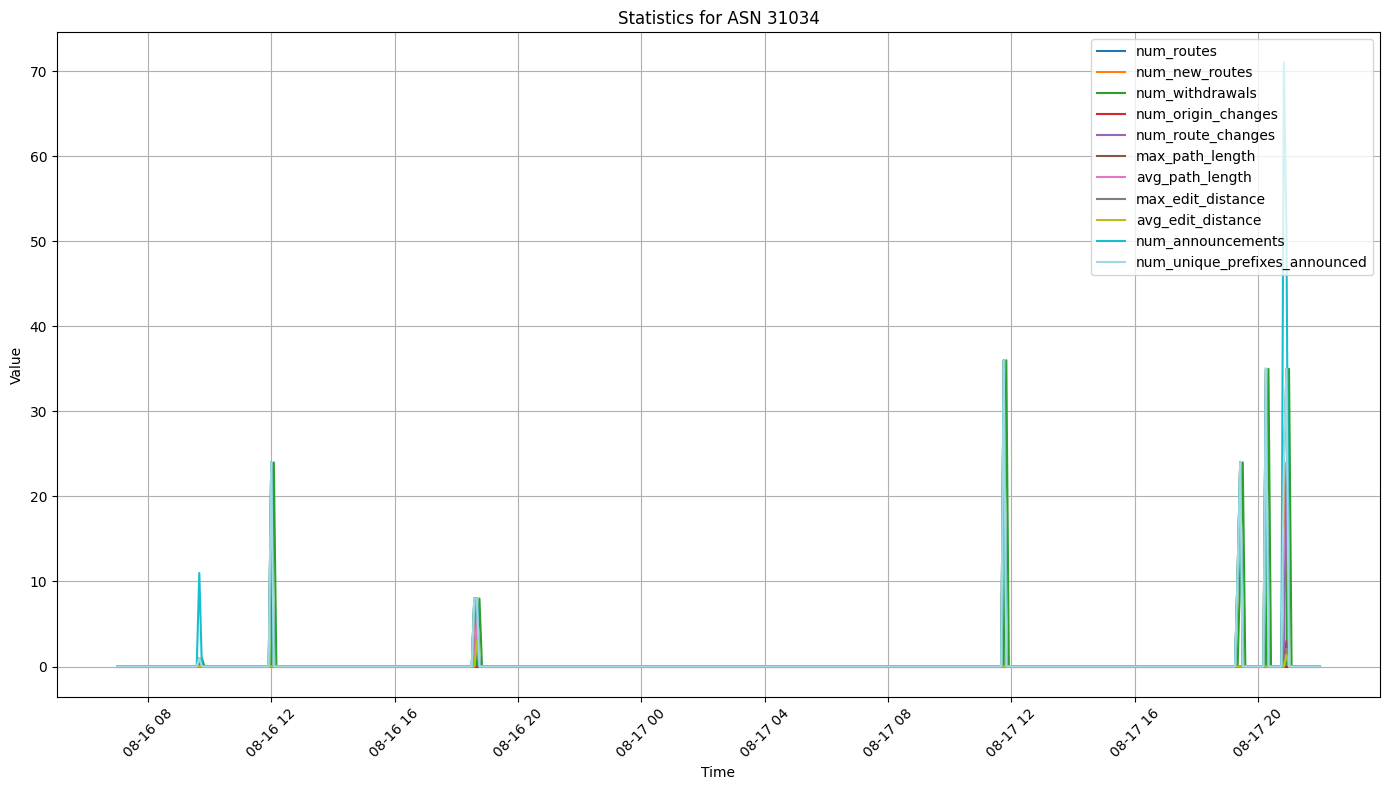

In [13]:
target_asn = "31034"
from_time = "2013-8-16 07:00:00"
until_time = "2013-8-17 22:00:00"
collectors = ["rrc00", "route-views2", "route-views3", "route-views4", "ris-ripe"]
output_file = f'bgp_features_asn_{target_asn}_ROS.csv'

df_features = extract_bgp_data(target_asn, from_time, until_time, collectors, output_file)
df_features['timestamp'] = pd.to_datetime(df_features['timestamp'])
numeric_cols = df_features.select_dtypes(include=['number']).columns
plot_statistics(df_features, target_asn)

In [20]:
df_features = pd.read_csv("/home/hb/dataset_bgp/bgp_tab_dataset/bgp_features_asn_31034_ROS_with_labels.csv")
df_features = df_features.drop(columns=['anomaly_status'])
df_features['timestamp'] = pd.to_datetime(df_features['timestamp'])
numeric_cols = df_features.select_dtypes(include=['number']).columns

df_features = detect_anomalies(df_features, numeric_cols, threshold_multiplier=2)
print(df_features[['timestamp', 'anomaly_status']])
df_features.to_csv(f'bgp_features_asn_31034_ROS_with_labels.csv', index=False)

              timestamp         anomaly_status
0   2013-08-16 07:00:00  no anomalies detected
1   2013-08-16 07:05:00  no anomalies detected
2   2013-08-16 07:10:00  no anomalies detected
3   2013-08-16 07:15:00  no anomalies detected
4   2013-08-16 07:20:00  no anomalies detected
..                  ...                    ...
464 2013-08-17 21:40:00  no anomalies detected
465 2013-08-17 21:45:00  no anomalies detected
466 2013-08-17 21:50:00  no anomalies detected
467 2013-08-17 21:55:00  no anomalies detected
468 2013-08-17 22:00:00  no anomalies detected

[469 rows x 2 columns]


# January 2017: Iranian pornography censorship
AS8529 - victim (receieved)
AS27589 - victim (hijacked)

Total records processed: 36275505
Total elements processed: 119080349
Data saved to bgp_features_asn_8529_iran.csv


/tmp/ipykernel_489684/1722542296.py:180: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = cm.get_cmap('tab20', num_colors)


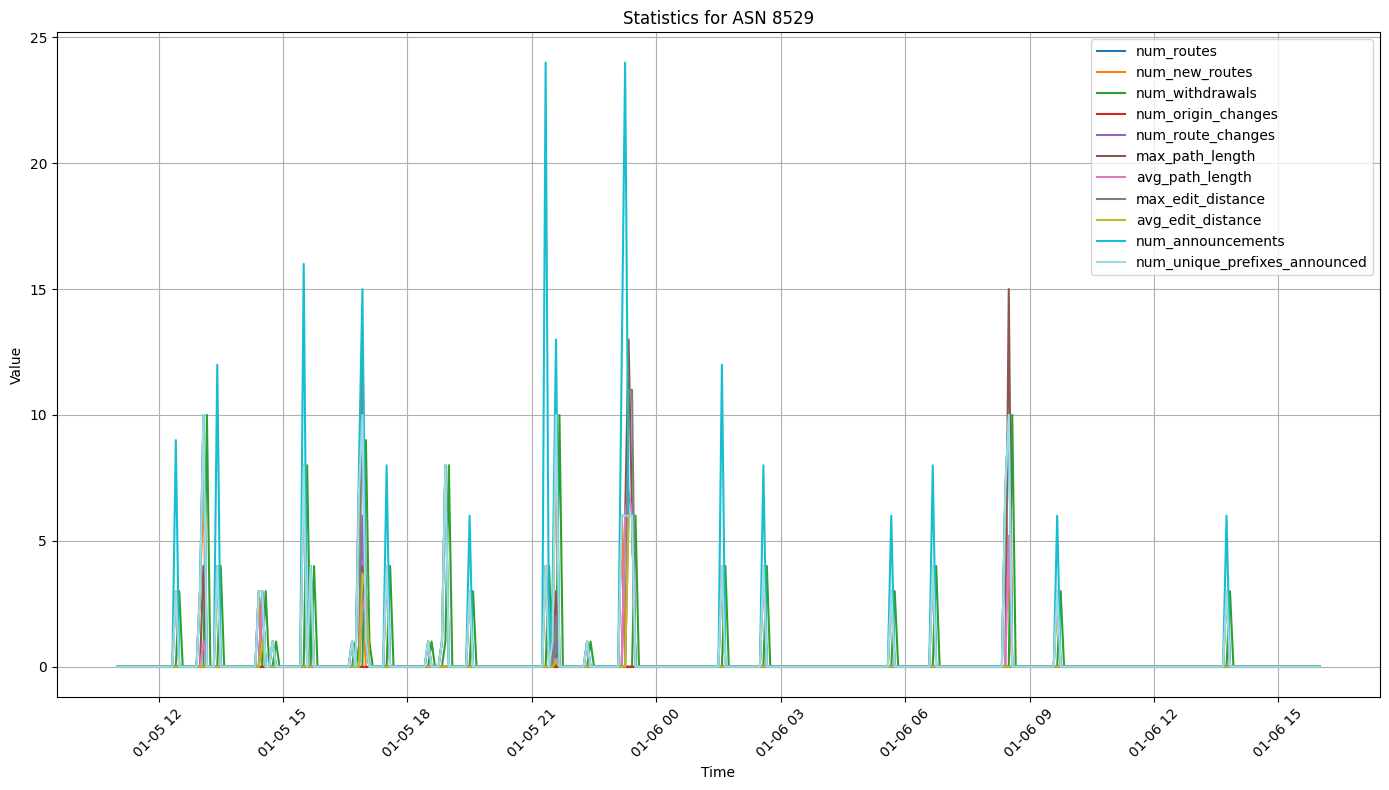

In [12]:
target_asn = "8529"
from_time = "2017-01-05 11:00:00"
until_time = "2017-01-06 16:00:00"
collectors = ["rrc00", "route-views2", "route-views3", "route-views4", "ris-ripe"]
output_file = f'bgp_features_asn_{target_asn}_iran.csv'

df_features = extract_bgp_data(target_asn, from_time, until_time, collectors, output_file)
df_features['timestamp'] = pd.to_datetime(df_features['timestamp'])
numeric_cols = df_features.select_dtypes(include=['number']).columns
plot_statistics(df_features, target_asn)

In [ ]:
df_features = pd.read_csv("/home/hb/dataset_bgp/bgp_tab_dataset/bgp_features_asn_8529_iran_with_labels.csv")
df_features = df_features.drop(columns=['anomaly_status'])
df_features['timestamp'] = pd.to_datetime(df_features['timestamp'])
numeric_cols = df_features.select_dtypes(include=['number']).columns

df_features = detect_anomalies(df_features, numeric_cols, threshold_multiplier=2)
df_features.to_csv(f'bgp_features_asn_8529_iran_with_labels.csv', index=False)

1718677613 HTTP ERROR: Timeout was reached (28)


Total records processed: 34096390
Total elements processed: 117298516
Data saved to bgp_features_asn_27589_iran.csv


/tmp/ipykernel_631538/3736920510.py:181: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = cm.get_cmap('tab20', num_colors)


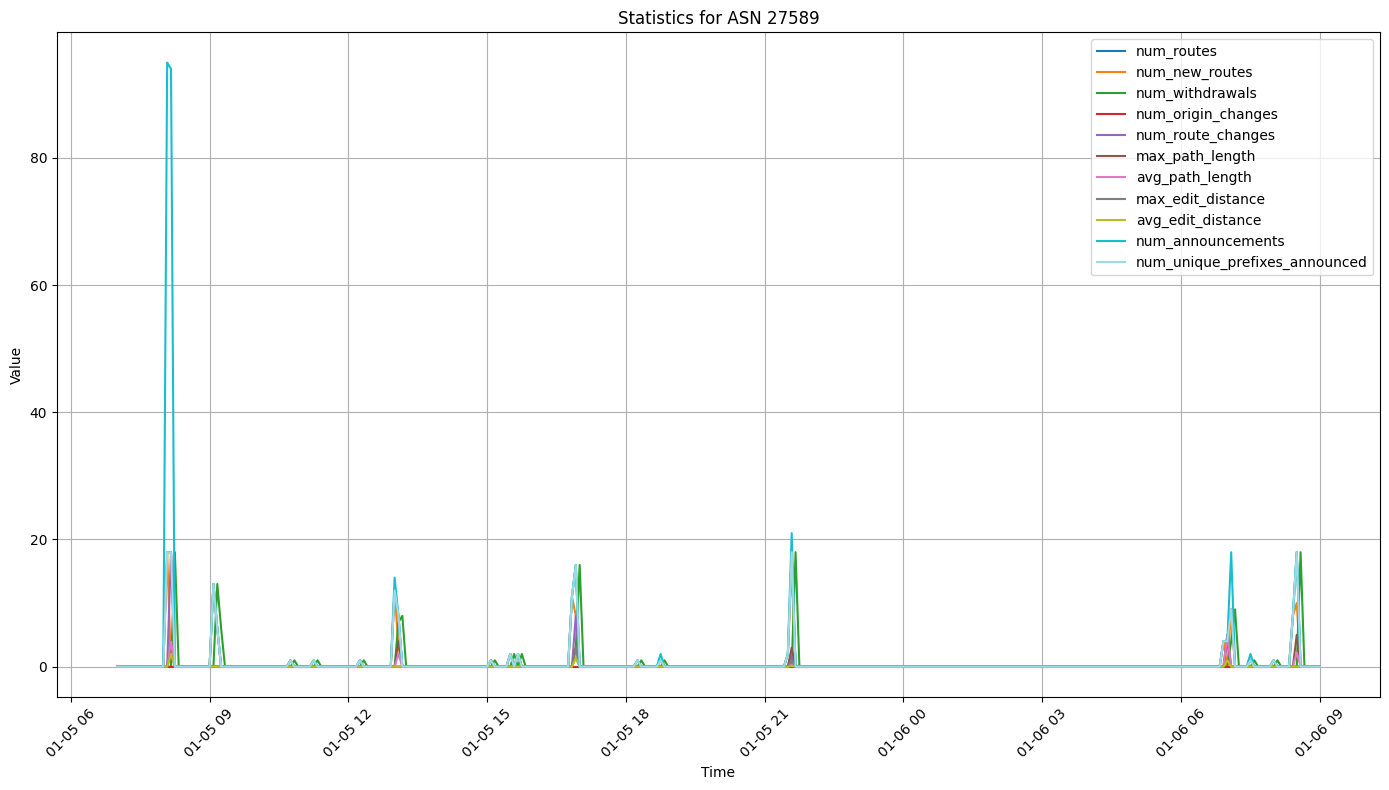

In [5]:
target_asn = "27589"
from_time = "2017-01-05 7:00:00"
until_time = "2017-01-06 9:00:00"
collectors = ["rrc00", "route-views2", "route-views3", "route-views4", "ris-ripe"]
output_file = f'bgp_features_asn_{target_asn}_iran.csv'

df_features = extract_bgp_data(target_asn, from_time, until_time, collectors, output_file)
df_features['timestamp'] = pd.to_datetime(df_features['timestamp'])
numeric_cols = df_features.select_dtypes(include=['number']).columns
plot_statistics(df_features, target_asn)

In [19]:
target_asn = "27589"
input_file = f'bgp_features_asn_{target_asn}_iran.csv'
df_features = pd.read_csv(input_file)
df_features['timestamp'] = pd.to_datetime(df_features['timestamp'])
numeric_cols = df_features.select_dtypes(include=['number']).columns

df_features = detect_anomalies(df_features, numeric_cols, threshold_multiplier=2)
output_file = input_file.replace('.csv', '_with_labels.csv')
df_features.to_csv(output_file, index=False)

# February 2021 Cablevision Mexico

Total records processed: 29819441
Total elements processed: 76510412
Data saved to bgp_features_asn_28548_mexico.csv


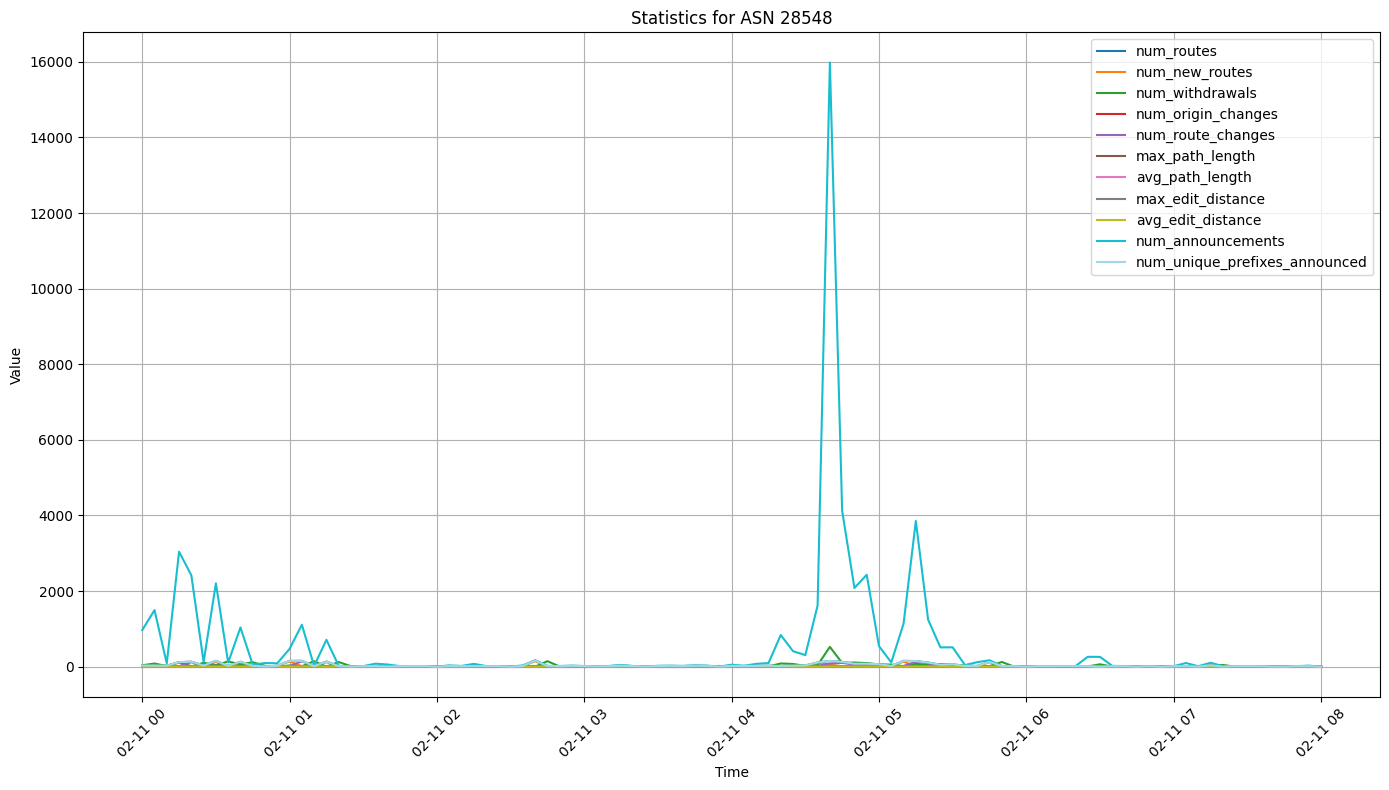

In [4]:
target_asn = "28548"
from_time = "2021-02-11 00:00:00"
until_time = "2021-02-11 08:00:00"
collectors = ["rrc00", "route-views.sg", "route-views.eqix"]
output_file = f'bgp_features_asn_{target_asn}_mexico.csv'

df_features = extract_bgp_data(target_asn, from_time, until_time, collectors, output_file)
df_features['timestamp'] = pd.to_datetime(df_features['timestamp'])
numeric_cols = df_features.select_dtypes(include=['number']).columns
plot_statistics(df_features, target_asn)

In [5]:
target_asn = "28548"
output_file = f'bgp_features_asn_{target_asn}_mexico.csv'
df_features = pd.read_csv(output_file)
df_features['timestamp'] = pd.to_datetime(df_features['timestamp'])
numeric_cols = df_features.select_dtypes(include=['number']).columns

df_features = detect_anomalies(df_features, numeric_cols, threshold_multiplier=2)
df_features.to_csv(f'{output_file}_with_labels.csv', index=False)

# November 2018: US-based China Telecom site originated Google addresses


1722590772 HTTP ERROR: Couldn't connect to server (7)
2024-08-02 18:26:12 410837: bs_transport_file.c:39: ERROR: Could not open http://data.ris.ripe.net/rrc00/2018.11/updates.20181112.1140.gz for reading
2024-08-02 18:26:12 410837: bgpstream_transport.c:97: ERROR: Could not open resource (http://data.ris.ripe.net/rrc00/2018.11/updates.20181112.1140.gz)
2024-08-02 18:26:12 410837: bgpstream_reader.c:169: WARNING: Could not open (http://data.ris.ripe.net/rrc00/2018.11/updates.20181112.1140.gz). Attempt 1 of 5


Total records processed: 41785145
Total elements processed: 119771335
Data saved to bgp_features_asn_4809_us_china_tel.csv


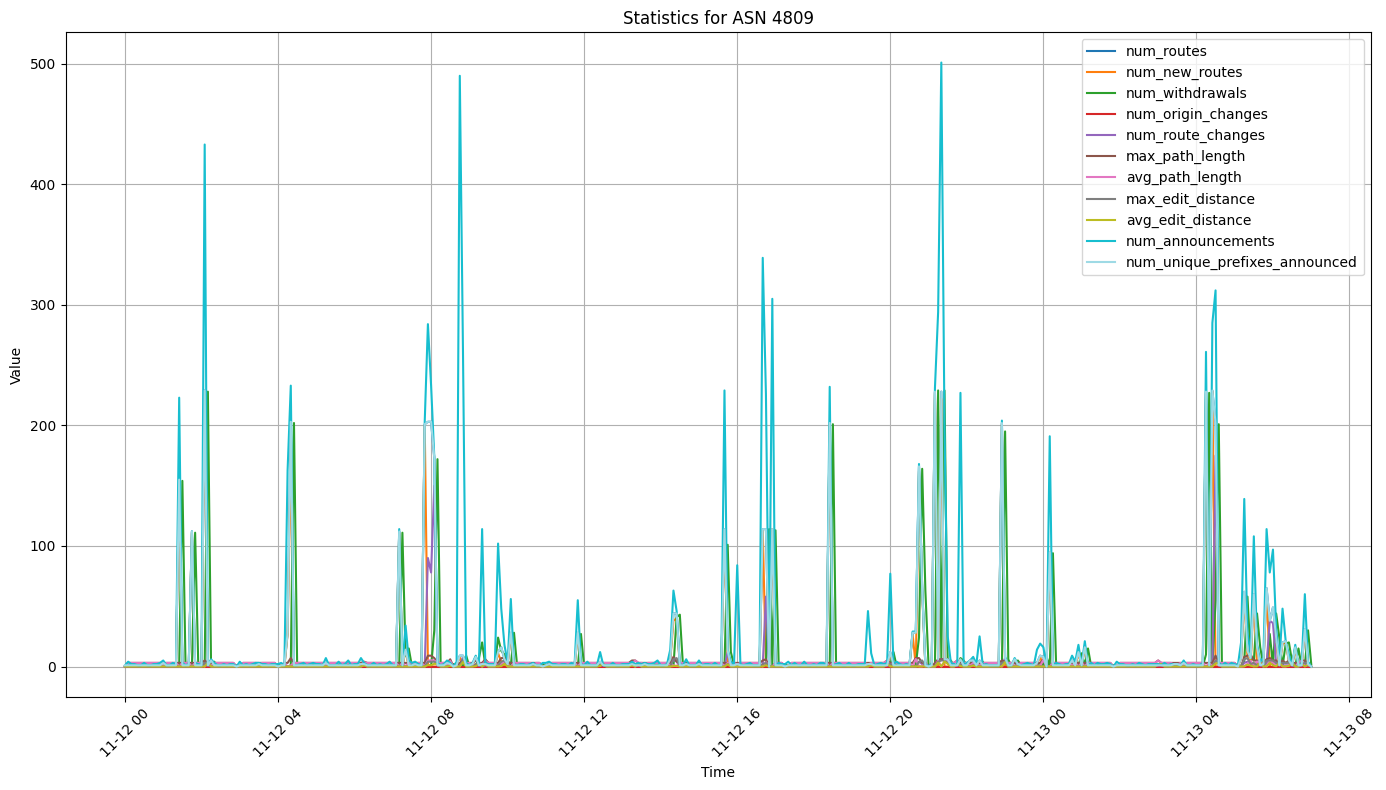

In [6]:
# suspicious_asns = {"20485", "4809", "37282"}
# target_asn = "20485"
target_asn = "4809"
from_time = "2018-11-12 00:00:00"
until_time = "2018-11-13 07:00:00"
collectors = ["rrc00", "route-views2", "route-views3", "route-views4", "ris-ripe"]
output_file = f'bgp_features_asn_{target_asn}_us_china_tel.csv'

df_features = extract_bgp_data(target_asn, from_time, until_time, collectors, output_file)
df_features['timestamp'] = pd.to_datetime(df_features['timestamp'])
numeric_cols = df_features.select_dtypes(include=['number']).columns
plot_statistics(df_features, target_asn)

In [3]:
target_asn = "4809"
input_file = f'bgp_features_asn_{target_asn}_us_china_tel.csv'
df_features = pd.read_csv(input_file)
df_features['timestamp'] = pd.to_datetime(df_features['timestamp'])
numeric_cols = df_features.select_dtypes(include=['number']).columns

df_features = detect_anomalies(df_features, numeric_cols, threshold_multiplier=2)
output_file = input_file.replace('.csv', '_with_labels.csv')
df_features.to_csv(output_file, index=False)

# 6 June 2019, European routing leak sends trraffic through China Telecom

Total records processed: 22642732
Total elements processed: 72001998
Data saved to bgp_features_asn_4134_eu_leak.csv


/tmp/ipykernel_631538/3736920510.py:181: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = cm.get_cmap('tab20', num_colors)


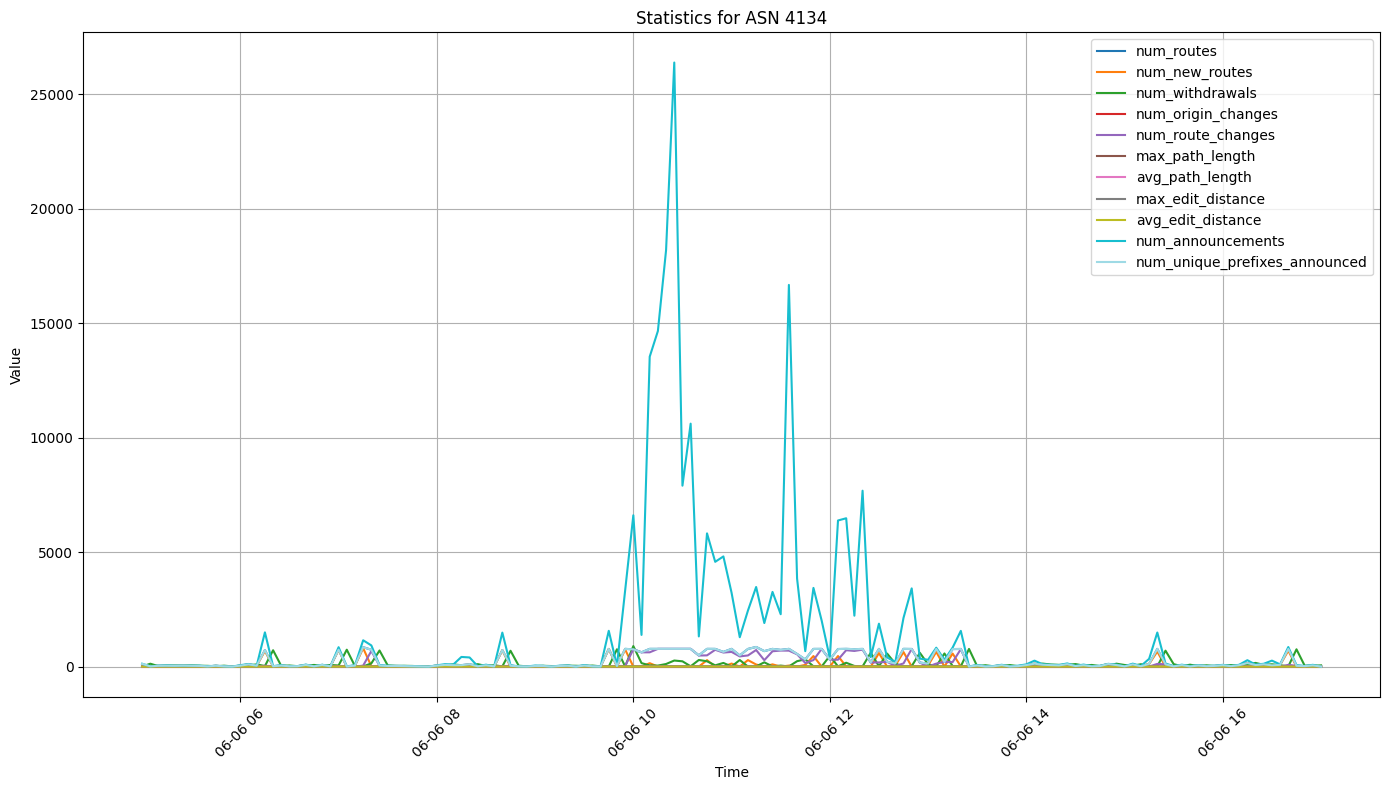

In [23]:
# Define the prefixes and AS paths involved in the incident
prefixes = {
    "46.145.0.0/16": "1136",  # KPN
    "46.14.128.0/17": "3303",  # Swisscom
    "176.171.75.0/24": "5410"  # Bouygues Telecom
    
}

target_asn = "4134" # China Telecom
from_time = "2019-06-06 05:00:00"
until_time = "2019-06-06 17:00:00"
collectors = ["rrc00", "route-views2", "route-views3", "route-views4", "ris-ripe"]
output_file = f'bgp_features_asn_{target_asn}_eu_leak.csv'

df_features = extract_bgp_data(target_asn, from_time, until_time, collectors, output_file)
df_features['timestamp'] = pd.to_datetime(df_features['timestamp'])
numeric_cols = df_features.select_dtypes(include=['number']).columns
plot_statistics(df_features, target_asn)

In [24]:
target_asn = "4134"
input_file = f'bgp_features_asn_{target_asn}_eu_leak.csv'
df_features = pd.read_csv(input_file)
df_features['timestamp'] = pd.to_datetime(df_features['timestamp'])
numeric_cols = df_features.select_dtypes(include=['number']).columns

df_features = detect_anomalies(df_features, numeric_cols, threshold_multiplier=2)
output_file = input_file.replace('.csv', '_with_labels.csv')
df_features.to_csv(output_file, index=False)

1718681868 HTTP ERROR: Timeout was reached (28)
1718681876 HTTP ERROR: Timeout was reached (28)


Total records processed: 9211607
Total elements processed: 30393756
Data saved to bgp_features_asn_1136_eu_leak.csv


/tmp/ipykernel_631538/3736920510.py:181: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = cm.get_cmap('tab20', num_colors)


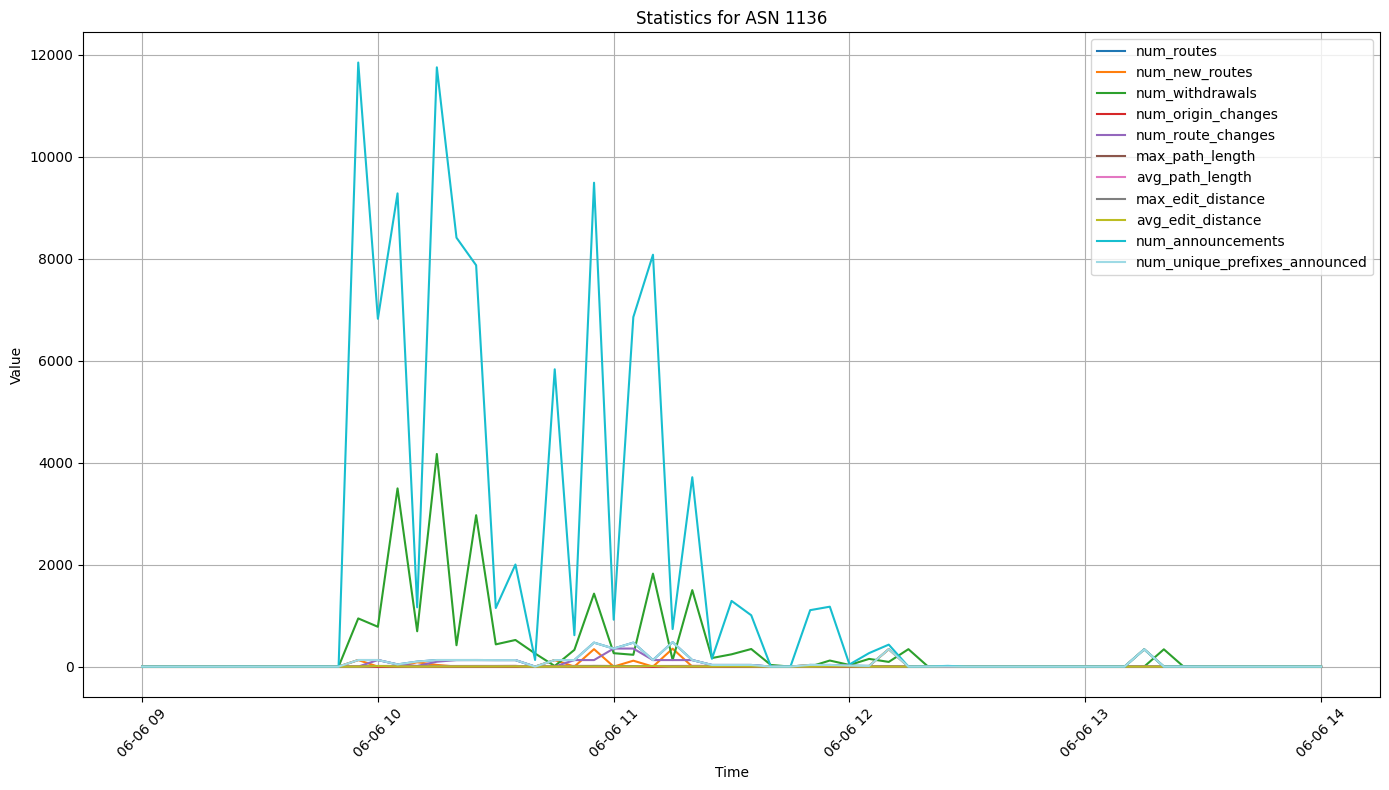

In [7]:
target_asn = "1136"
from_time = "2019-06-06 09:00:00"
until_time = "2019-06-06 14:00:00"
collectors = ["rrc00", "route-views2", "route-views3", "route-views4", "ris-ripe"]
output_file = f'bgp_features_asn_{target_asn}_eu_leak.csv'

df_features = extract_bgp_data(target_asn, from_time, until_time, collectors, output_file)
df_features['timestamp'] = pd.to_datetime(df_features['timestamp'])
numeric_cols = df_features.select_dtypes(include=['number']).columns
plot_statistics(df_features, target_asn)

In [17]:
target_asn = "1136"
input_file = f'bgp_features_asn_{target_asn}_eu_leak.csv'
df_features = pd.read_csv(input_file)
df_features['timestamp'] = pd.to_datetime(df_features['timestamp'])
numeric_cols = df_features.select_dtypes(include=['number']).columns

df_features = detect_anomalies(df_features, numeric_cols, threshold_multiplier=2)
output_file = input_file.replace('.csv', '_with_labels.csv')
df_features.to_csv(output_file, index=False)

Total records processed: 22642732
Total elements processed: 72001998
Data saved to bgp_features_asn_3303_eu_leak.csv


/tmp/ipykernel_631538/3736920510.py:181: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = cm.get_cmap('tab20', num_colors)


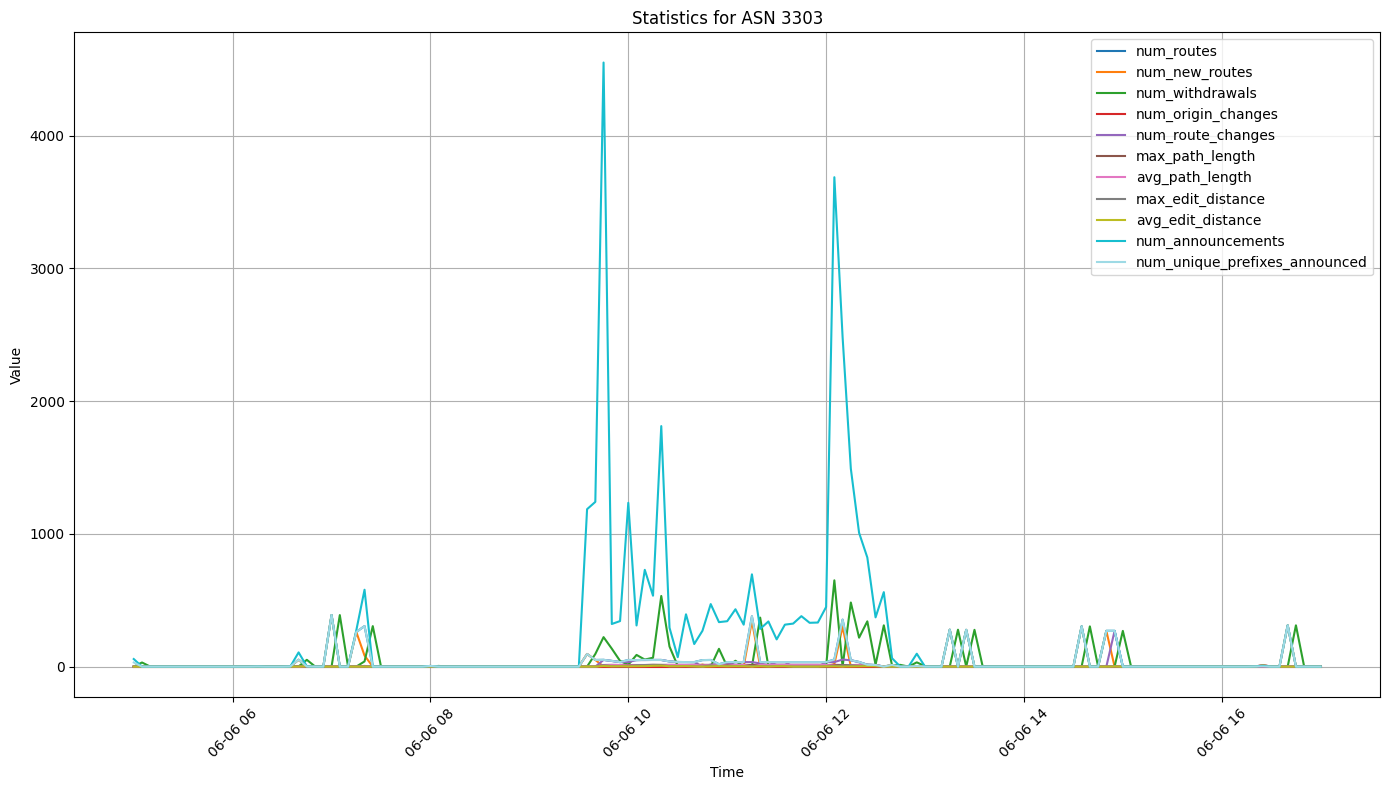

In [22]:
target_asn = "3303"
from_time = "2019-06-06 05:00:00"
until_time = "2019-06-06 17:00:00"
collectors = ["rrc00", "route-views2", "route-views3", "route-views4", "ris-ripe"]
output_file = f'bgp_features_asn_{target_asn}_eu_leak.csv'

df_features = extract_bgp_data(target_asn, from_time, until_time, collectors, output_file)
df_features['timestamp'] = pd.to_datetime(df_features['timestamp'])
numeric_cols = df_features.select_dtypes(include=['number']).columns
plot_statistics(df_features, target_asn)

In [25]:
target_asn = "3303"
input_file = f'bgp_features_asn_{target_asn}_eu_leak.csv'
df_features = pd.read_csv(input_file)
df_features['timestamp'] = pd.to_datetime(df_features['timestamp'])
numeric_cols = df_features.select_dtypes(include=['number']).columns

df_features = detect_anomalies(df_features, numeric_cols, threshold_multiplier=2)
output_file = input_file.replace('.csv', '_with_labels.csv')
df_features.to_csv(output_file, index=False)

# January 22, 2006: Con Edison Communications hijacks big chunk of the Internet

2024-06-18 14:56:48 631538: bgpstream_parsebgp_common.c:587: WARNING: Read truncated record 9861 from 'http://archive.routeviews.org/bgpdata/2006.01/UPDATES/updates.20060122.0028.bz2'
2024-06-18 14:56:48 631538: bgpstream_parsebgp_common.c:587: WARNING: Read truncated record 17214 from 'http://archive.routeviews.org/bgpdata/2006.01/UPDATES/updates.20060122.0028.bz2'
2024-06-18 14:57:26 631538: bgpstream_parsebgp_common.c:587: WARNING: Read truncated record 8441 from 'http://archive.routeviews.org/bgpdata/2006.01/UPDATES/updates.20060122.0304.bz2'
2024-06-18 14:57:27 631538: bgpstream_parsebgp_common.c:587: WARNING: Read truncated record 27786 from 'http://archive.routeviews.org/bgpdata/2006.01/UPDATES/updates.20060122.0304.bz2'
2024-06-18 14:57:28 631538: bgpstream_parsebgp_common.c:587: WARNING: Read truncated record 31673 from 'http://archive.routeviews.org/bgpdata/2006.01/UPDATES/updates.20060122.0304.bz2'
2024-06-18 14:57:29 631538: bgpstream_parsebgp_common.c:587: WARNING: Read tr

Total records processed: 2471297
Total elements processed: 6929160
Data saved to bgp_features_asn_27506_ConEdison_hijack.csv


/tmp/ipykernel_631538/3736920510.py:181: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = cm.get_cmap('tab20', num_colors)


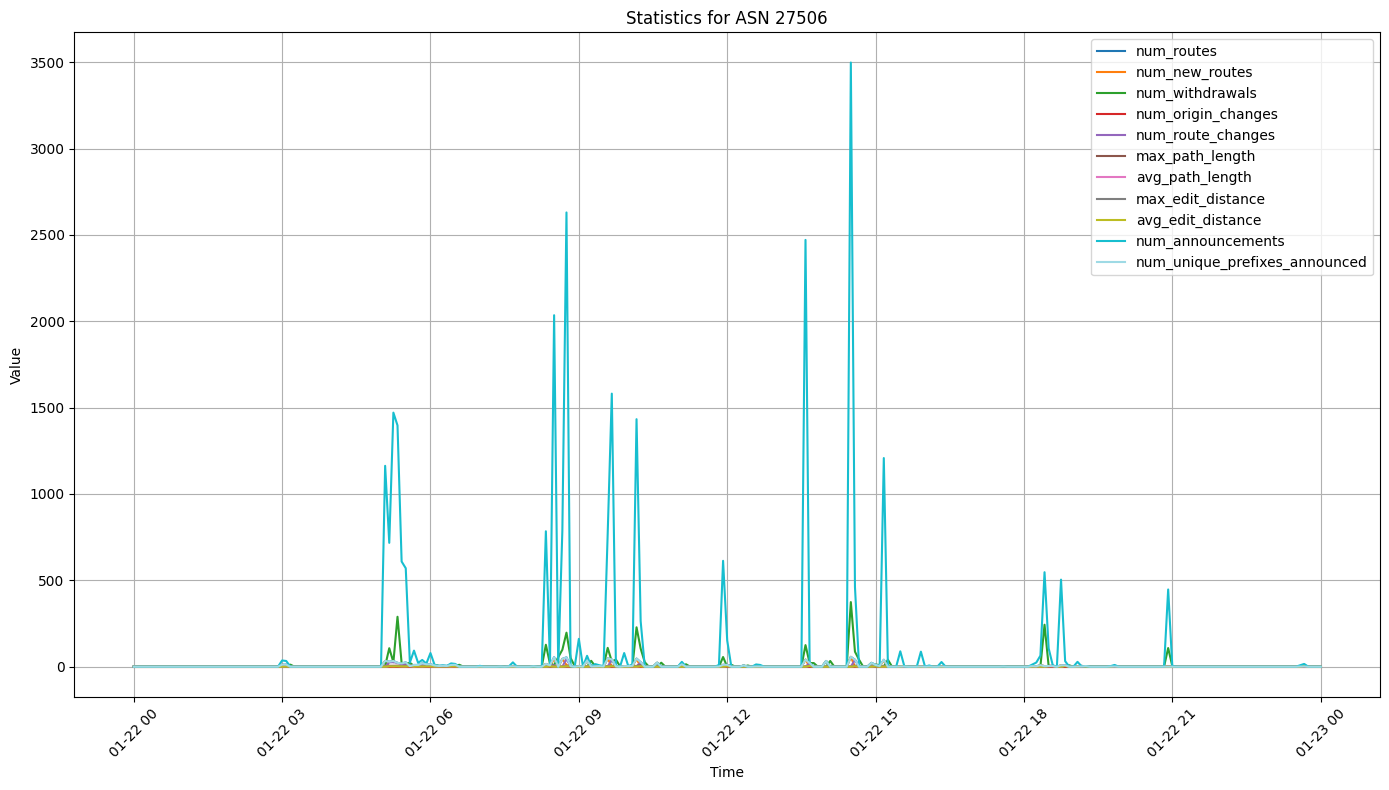

In [20]:
from_time = "2006-01-22 00:00:00"
until_time = "2006-01-23 00:00:00"
target_asn = "27506"
collectors = ["rrc00", "route-views2", "route-views3", "route-views4", "ris-ripe"]
output_file = f'bgp_features_asn_{target_asn}_ConEdison_hijack.csv'

df_features = extract_bgp_data(target_asn, from_time, until_time, collectors, output_file)
df_features['timestamp'] = pd.to_datetime(df_features['timestamp'])
numeric_cols = df_features.select_dtypes(include=['number']).columns
plot_statistics(df_features, target_asn)

In [ ]:
target_asn = "27506"
input_file = f'bgp_features_asn_{target_asn}_ConEdison_hijack.csv'
df_features = pd.read_csv(input_file)
df_features['timestamp'] = pd.to_datetime(df_features['timestamp'])
numeric_cols = df_features.select_dtypes(include=['number']).columns

df_features = detect_anomalies(df_features, numeric_cols, threshold_multiplier=2)
output_file = input_file.replace('.csv', '_with_labels.csv')
df_features.to_csv(output_file, index=False)

# July 2018: Iran Telecommunication Company (AS58224) originated 10 prefixes of Telegram Messenger.

In [ ]:
from_time = "2018-07-29 20:00:00"
until_time = "2018-07-30 22:00:00"
target_asn = "58224"
collectors = ["rrc00", "route-views2", "route-views3", "route-views4", "ris-ripe"]
output_file = f'bgp_features_asn_{target_asn}_iran_telegram.csv'

df_features = extract_bgp_data(target_asn, from_time, until_time, collectors, output_file)
df_features['timestamp'] = pd.to_datetime(df_features['timestamp'])
numeric_cols = df_features.select_dtypes(include=['number']).columns
plot_statistics(df_features, target_asn)

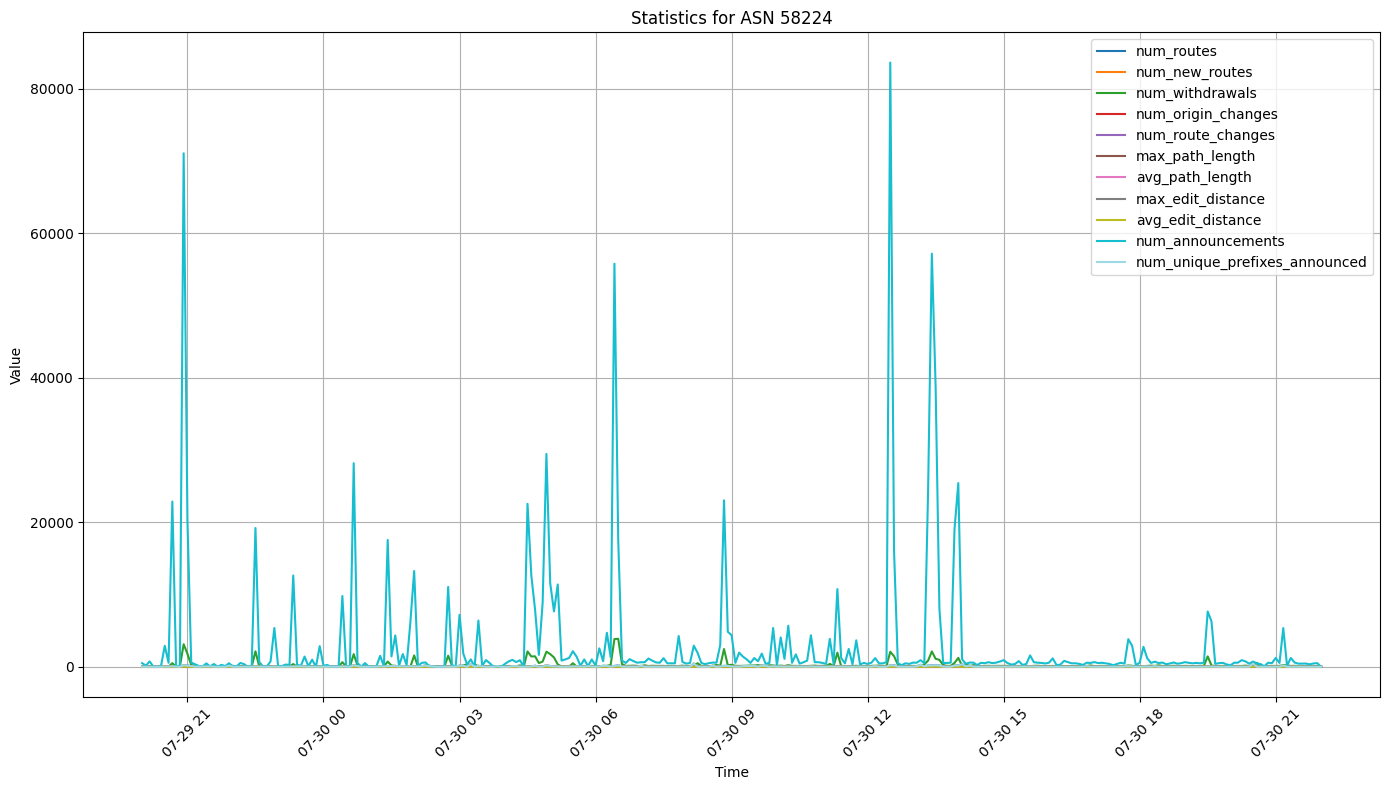

In [13]:
plot_statistics(df_features, target_asn)

In [14]:
target_asn = "58224"
input_file = f'bgp_features_asn_{target_asn}_iran_telegram.csv'
df_features = pd.read_csv(input_file)
df_features['timestamp'] = pd.to_datetime(df_features['timestamp'])
numeric_cols = df_features.select_dtypes(include=['number']).columns

df_features = detect_anomalies(df_features, numeric_cols, threshold_multiplier=1.5)
output_file = input_file.replace('.csv', '_with_labels.csv')
df_features.to_csv(output_file, index=False)

# On May 8 Public DNS in Taiwan the latest victim to BGP hijack -test?

Total records processed: 4577595
Total elements processed: 10985641
Data saved to bgp_features_asn_268869_dns_taiwan.csv


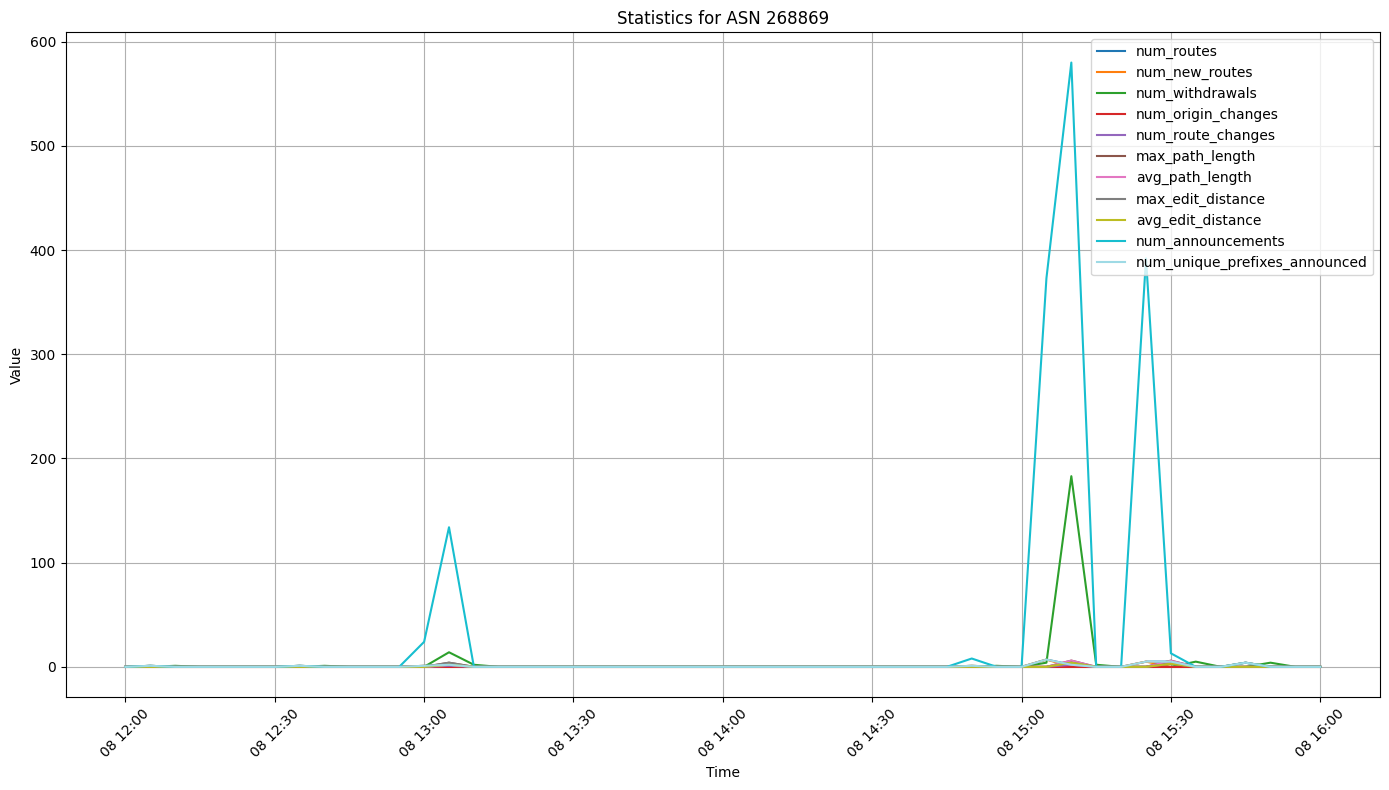

In [2]:
from_time = "2019-05-08 12:00:00"
until_time = "2019-05-08 16:00:00 "
target_asn = "268869"
collectors = ["rrc00", "route-views1.saopaulo", "route-views2.saopaulo"]
output_file = f'bgp_features_asn_{target_asn}_dns_taiwan.csv'

df_features = extract_bgp_data(target_asn, from_time, until_time, collectors, output_file)
df_features['timestamp'] = pd.to_datetime(df_features['timestamp'])
numeric_cols = df_features.select_dtypes(include=['number']).columns
plot_statistics(df_features, target_asn)

In [3]:
target_asn = "268869"
input_file = f'bgp_features_asn_{target_asn}_dns_taiwan.csv'
df_features = pd.read_csv(input_file)
df_features['timestamp'] = pd.to_datetime(df_features['timestamp'])
numeric_cols = df_features.select_dtypes(include=['number']).columns

df_features = detect_anomalies(df_features, numeric_cols, threshold_multiplier=2)
output_file = input_file.replace('.csv', '_with_labels.csv')
df_features.to_csv(output_file, index=False)

# BGP hijack of Twitter by Russian ISP

1723180728 HTTP ERROR: Failure when receiving data from the peer (56)
1723180975 HTTP ERROR: Failure when receiving data from the peer (56)
1723181720 HTTP ERROR: Failure when receiving data from the peer (56)
1723181721 HTTP ERROR: Failure when receiving data from the peer (56)
1723181833 HTTP ERROR: Failure when receiving data from the peer (56)
1723181837 HTTP ERROR: Failure when receiving data from the peer (56)


Total records processed: 27960182
Total elements processed: 73734751
Data saved to bgp_features_asn_8342_twitter.csv


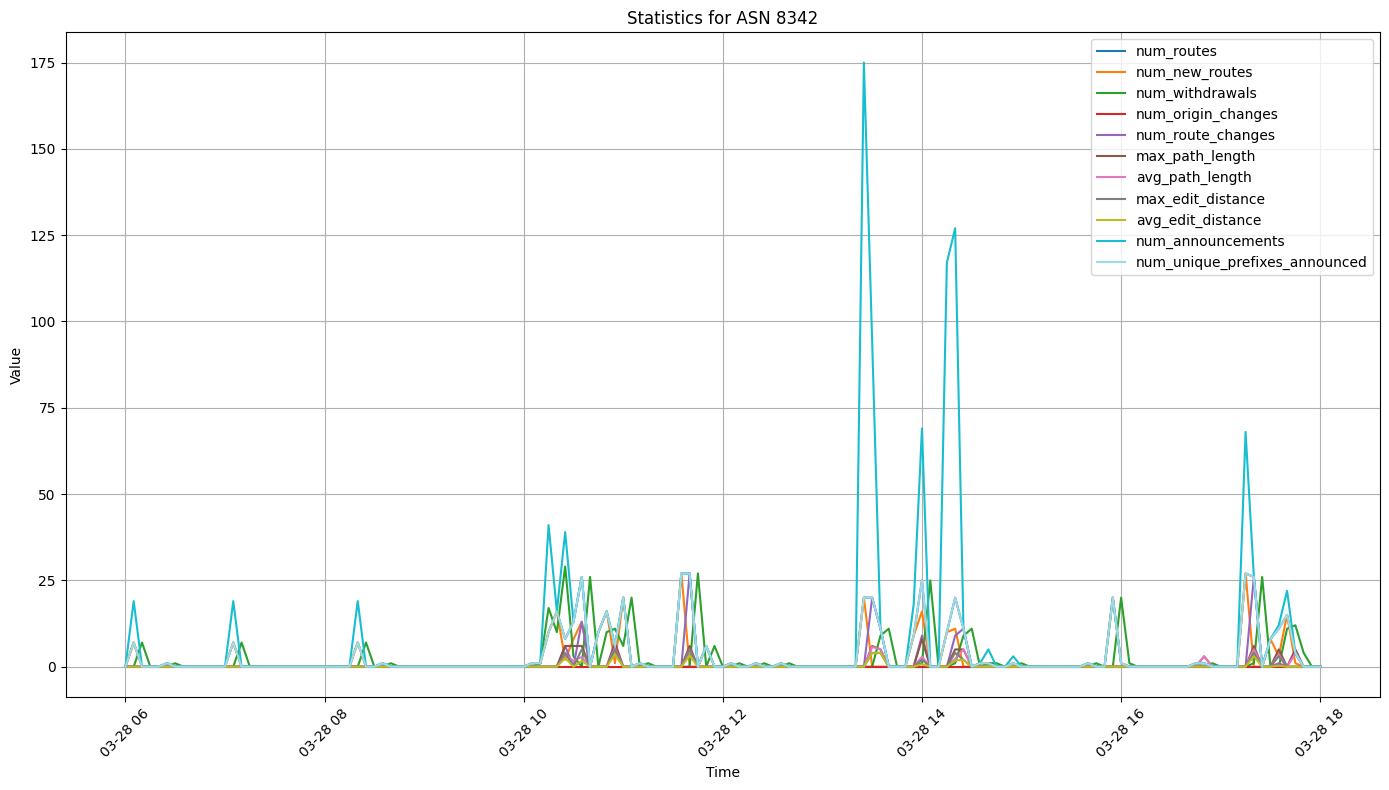

In [4]:
from_time = "2022-03-28 06:00:00"
until_time = "2022-03-28 18:00:00 "
target_asn = "8342"
collectors = ["rrc00", "route-views1.saopaulo", "route-views2.saopaulo"]
output_file = f'bgp_features_asn_{target_asn}_twitter.csv'

df_features = extract_bgp_data(target_asn, from_time, until_time, collectors, output_file)
df_features['timestamp'] = pd.to_datetime(df_features['timestamp'])
numeric_cols = df_features.select_dtypes(include=['number']).columns
plot_statistics(df_features, target_asn)

In [5]:
target_asn = "8342"
input_file = f'bgp_features_asn_{target_asn}_twitter.csv'
df_features = pd.read_csv(input_file)
df_features['timestamp'] = pd.to_datetime(df_features['timestamp'])
numeric_cols = df_features.select_dtypes(include=['number']).columns

df_features = detect_anomalies(df_features, numeric_cols, threshold_multiplier=2)
input_file = input_file.replace('.csv', '_with_labels.csv')
df_features.to_csv(input_file, index=False)